# 1 Author

**Student Name**:  Aris Christofides

**Student ID**:  210911099



# 2 Problem formulation

For the advanced solution my task is to build a machine learning pipeline makes a 4-class classification for 4 different songs.

# 3 Machine Learning pipeline

My ML pipeline starts off with importing all the necessary libraries and my personal google drive. The I perform feature extraction and convert the data into a pandas dataframe. Then I do feature extraction to get the pitch and add it to a function. Then I apply that function to obtain numpy arrays for predictors "X" and labels "y". After that, I split the training and validation data into 80%/20%. After splitting I implemented 2 different models. Multi-layer Perceptron Classifier and Random Forest Classifier. After MLP, I normalised the predictors to see if I get better results. I finished of with testing 2 different audio recordings, using MLP for a "Frozen" sample and Random Forest Classifier for a "Mamma" sample.

# 4 Transformation stage
I had to do feature extraction and clean up the data in order to have only 4 labels. The data was full of incorrectly named files that would confuse our models. If there are "mamma", "Mamma Mia", "frozen", "Let_it_go" and so on, that means that our models have to classify multiple different classes instead of just 4 and therefore accuracy would probably be extremely bad. In addition, a song only has one name. So I removed all the wrong labeled songs using for loops to catch special characters and anything else different than the correct name of the song. After that I defined a function to extract the pitch from the audio files.

# 5 Modeling
I used Multi-layer Perceptron Classifier and Random Forest Classifier

# 6 Methodology

Models will be trained using 80% of the data and validated on the remaining 20%
The model performance is assessed on both training and validation accuracy.

# 7 Dataset

Importing Python libraries and mounting personal Google Drive storage system

In [ ]:
from google.colab import drive

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os, sys, re, pickle, glob
import urllib.request
import zipfile

import IPython.display as ipd
from tqdm import tqdm
import librosa

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
directory_to_extract_to = '/content/drive/MyDrive/Data2/MLEndHW/sample2/'
zip_path = '/content/drive/MyDrive/Data2/MLEndHW/MLEndHW_Sample2.zip'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)

sample_path = '/content/drive/MyDrive/Data2/MLEndHW/sample2/*.wav'
files = glob.glob(sample_path)
len(files)

838

In [ ]:
for file in files:
  print(file.split('/')[-1])

S1_hum_2_Frozen.wav
S1_hum_2_Hakuna.wav
S1_hum_2_Mamma.wav
S1_hum_2_Panther.wav
S1_whistle_1_Panther.wav
S1_whistle_2_Frozen.wav
S1_whistle_2_Hakuna.wav
S1_whistle_2_Mamma.wav
S10_hum_1_Hakuna.wav
S10_hum_2_Frozen.wav
S10_hum_2_Hakuna.wav
S10_hum_2_Mamma.wav
S10_hum_2_Panther.wav
S10_hum_3_Mamma.wav
S10_hum_4_Frozen.wav
S10_hum_4_Panther.wav
S100_hum_1_Hakuna.wav
S100_hum_2_Frozen.wav
S100_hum_2_Hakuna.wav
S100_hum_2_Mamma.wav
S100_hum_2_Panther.wav
S100_hum_3_Mamma.wav
S100_hum_4_Frozen.wav
S100_hum_4_Panther.wav
S101_hum_1_Hakuna.wav
S101_hum_2_Frozen.wav
S101_hum_2_Hakuna.wav
S101_hum_2_Mamma.wav
S101_hum_2_Panther.wav
S101_hum_3_Mamma.wav
S101_hum_4_Frozen.wav
S101_hum_4_Panther.wav
S102_hum_2_Frozen.wav
S102_hum_2_Hakuna.wav
S102_hum_2_Mamma.wav
S102_hum_2_Panther.wav
S102_whistle_1_Panther.wav
S102_whistle_2_Frozen.wav
S102_whistle_2_Hakuna.wav
S102_whistle_2_Mamma.wav
S103_hum_2_Frozen.wav
S103_hum_2_Hakuna.wav
S103_hum_2_Mamma.wav
S103_hum_2_Panther.wav
S103_whistle_1_Panther.w

Feature Extraction

In [ ]:
print('The full path to the first audio file is: ', files[0])
print('\n')
print('The name of the first audio file is: ', files[0].split('/')[-1])
print('    The participand ID is: ', files[0].split('/')[-1].split('_')[0])
print('    The type of interpretation is: ', files[0].split('/')[-1].split('_')[1])
print('    The interpretation number is: ', files[0].split('/')[-1].split('_')[2])
print('    The song is: ', files[0].split('/')[-1].split('_')[3])

The full path to the first audio file is:  /content/drive/MyDrive/Data2/MLEndHW/sample2/S1_hum_2_Frozen.wav


The name of the first audio file is:  S1_hum_2_Frozen.wav
    The participand ID is:  S1
    The type of interpretation is:  hum
    The interpretation number is:  2
    The song is:  Frozen.wav


Creating a list and removing wrong files

In [ ]:
MLENDHW_table = [] 

for file in files:
  if '[' in file or ']' in file or '(' in file or ')' in file:
    os.remove(file)
    print("Removed file:", file)
  else:
    try:
      file_name = file.split('/')[-1]
      participant_ID = file.split('/')[-1].split('_')[0]
      interpretation_type = file.split('/')[-1].split('_')[1]
      interpretation_number = file.split('/')[-1].split('_')[2]
      song = file.split('/')[-1].split('_')[3].split('.')[0]
      if song == "Panther" or song == "Hakuna" or song == "Mamma" or song == "Frozen":
        MLENDHW_table.append([file_name,participant_ID,interpretation_type,interpretation_number, song])
      else:
        os.remove(file)
        print("Removed file:", file)
    except:
      os.remove(file)
      print("Removed file:", file)

Removed file: /content/drive/MyDrive/Data2/MLEndHW/sample2/S104_Hum_2_HakunaMatata.wav
Removed file: /content/drive/MyDrive/Data2/MLEndHW/sample2/S104_Hum_3_HakunaMatata.wav
Removed file: /content/drive/MyDrive/Data2/MLEndHW/sample2/S105_hum_1_hakuna matata.wav
Removed file: /content/drive/MyDrive/Data2/MLEndHW/sample2/S105_hum_1_pink panther.wav
Removed file: /content/drive/MyDrive/Data2/MLEndHW/sample2/S105_whistle_1_hakunamatata.wav
Removed file: /content/drive/MyDrive/Data2/MLEndHW/sample2/S105_whistle_1_mamamia.wav
Removed file: /content/drive/MyDrive/Data2/MLEndHW/sample2/S105_whistle_2_mamamia.wav
Removed file: /content/drive/MyDrive/Data2/MLEndHW/sample2/S105_whistle_2_pink panther.wav
Removed file: /content/drive/MyDrive/Data2/MLEndHW/sample2/S109_hum_1_[Frozen].wav
Removed file: /content/drive/MyDrive/Data2/MLEndHW/sample2/S109_hum_1_[Mamma].wav
Removed file: /content/drive/MyDrive/Data2/MLEndHW/sample2/S109_hum_1_[Panther].wav
Removed file: /content/drive/MyDrive/Data2/MLEnd

Update data

In [ ]:
sample_path = '/content/drive/MyDrive/Data2/MLEndHW/sample2/*.wav'
files = glob.glob(sample_path)
len(files)

667

Loading list into pandas dataframe

In [ ]:
MLENDHW_df = pd.DataFrame(MLENDHW_table,columns=['file_id','participant','interpretation','number','song']).set_index('file_id') 
MLENDHW_df

participant interpretation number     song
file_id                                                            
S1_hum_2_Frozen.wav               S1            hum      2   Frozen
S1_hum_2_Hakuna.wav               S1            hum      2   Hakuna
S1_hum_2_Mamma.wav                S1            hum      2    Mamma
S1_hum_2_Panther.wav              S1            hum      2  Panther
S1_whistle_1_Panther.wav          S1        whistle      1  Panther
...                              ...            ...    ...      ...
S97_hum_2_Mamma.wav              S97            hum      2    Mamma
S97_hum_2_Panther.wav            S97            hum      2  Panther
S97_hum_3_Mamma.wav              S97            hum      3    Mamma
S97_hum_4_Frozen.wav             S97            hum      4   Frozen
S97_hum_4_Panther.wav            S97            hum      4  Panther

[667 rows x 4 columns]

Feature extraction : Pitch

The next cell defines a function that gets the pitch of an audio signal.

In [ ]:
def getPitch(x,fs,winLen=0.02):
  #winLen = 0.02 
  p = winLen*fs
  frame_length = int(2**int(p-1).bit_length())
  hop_length = frame_length//2
  f0, voiced_flag, voiced_probs = librosa.pyin(y=x, fmin=80, fmax=450, sr=fs,
                                                 frame_length=frame_length,hop_length=hop_length)
  return f0,voiced_flag

This cell defines a function that takes a number of files and creates a NumPy array containing the 4 audio features used as predictors (`X`) and a binary label (`y`), that indicates what is the name of the song.

In [ ]:
def getXy(files,labels_file, scale_audio=False, onlySingleDigit=False):
  X,y =[],[]
  for file in tqdm(files):
    fileID = file.split('/')[-1]
    file_name = file.split('/')[-1]
    yi = labels_file.loc[fileID]['song']

    fs = None # if None, fs would be 22050
    x, fs = librosa.load(file,sr=fs)
    if scale_audio: x = x/np.max(np.abs(x))
    f0, voiced_flag = getPitch(x,fs,winLen=0.02)
      
    power = np.sum(x**2)/len(x)
    pitch_mean = np.nanmean(f0) if np.mean(np.isnan(f0))<1 else 0
    pitch_std  = np.nanstd(f0) if np.mean(np.isnan(f0))<1 else 0
    voiced_fr = np.mean(voiced_flag)

    xi = [power,pitch_mean,pitch_std,voiced_fr]
    X.append(xi)
    y.append(yi)

  return np.array(X),np.array(y)

Let's apply `getXy` to the subsample and obtain the NumPy predictor array (`X`) and a binary label (`y`).

In [ ]:
X,y = getXy(files, labels_file=MLENDHW_df, scale_audio=True, onlySingleDigit=True)

100%|██████████| 667/667 [34:35<00:00,  3.11s/it]


Implementing the MLP Classifier

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=42, test_size=0.2)

clf = MLPClassifier()
clf.fit(X_train, y_train)

yt_p = clf.predict(X_train)
yv_p = clf.predict(X_val)

print('Training Accuracy', np.mean(yt_p==y_train))
print('Validation  Accuracy', np.mean(yv_p==y_val))

Training Accuracy 0.3827392120075047
Validation  Accuracy 0.27611940298507465


Normalising the predictors, to see if the performance improves

In [ ]:
mean = X_train.mean(0)
sd =  X_train.std(0)

X_train = (X_train-mean)/sd
X_val  = (X_val-mean)/sd

clf  = MLPClassifier()
clf.fit(X_train, y_train)

yt_p = clf.predict(X_train)
yv_p = clf.predict(X_val)

print('Training Accuracy', np.mean(yt_p==y_train))
print('Validation  Accuracy', np.mean(yv_p==y_val))

Training Accuracy 0.5440900562851783
Validation  Accuracy 0.3283582089552239


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Implementing Random Forest Classifier for potentially better results

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(max_depth=5)
model.fit(X_train, y_train)

yt_pr = model.predict(X_train)
yv_pr = model.predict(X_val)

print('Training Accuracy', np.mean(yt_pr==y_train))
print('Validation  Accuracy', np.mean(yv_pr==y_val))

Training Accuracy 0.6960600375234521
Validation  Accuracy 0.417910447761194


Creating function to test our model

In [ ]:
def getXy1(files, scale_audio=False, onlySingleDigit=False):
  X = []

  fs = None # if None, fs would be 22050
  x, fs = librosa.load(files,sr=fs)
  if scale_audio: x = x/np.max(np.abs(x))
  f0, voiced_flag = getPitch(x,fs,winLen=0.02)
    
  power = np.sum(x**2)/len(x)
  pitch_mean = np.nanmean(f0) if np.mean(np.isnan(f0))<1 else 0
  pitch_std  = np.nanstd(f0) if np.mean(np.isnan(f0))<1 else 0
  voiced_fr = np.mean(voiced_flag)

  xi = [power,pitch_mean,pitch_std,voiced_fr]
  X.append(xi)

  return np.array(X)

Lets try to send in some new data to test both models on 2 different samples. Here are 2 samples, the first one being a "Frozen" audio file and the second one being "Mamma". These data come from the deleted files which had wrong labels.

Frozen:

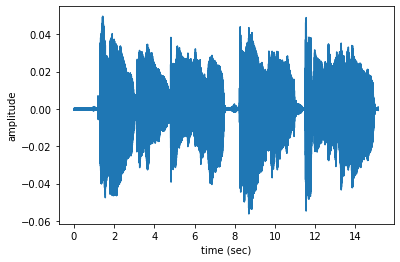

In [ ]:
n = "/content/S8_hum_3_[Frozen].wav"
fs = None # Sampling frequency. If None, fs would be 22050
x, fs = librosa.load(n,sr=fs)
t = np.arange(len(x))/fs
plt.plot(t,x)
plt.xlabel('time (sec)')
plt.ylabel('amplitude')
plt.show()
display(ipd.Audio(n))

Mamma:

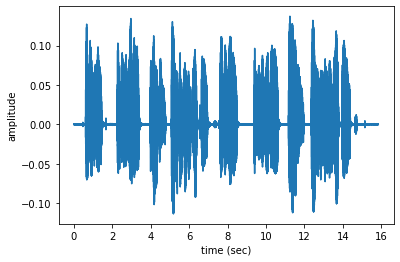

In [ ]:
n1 = "/content/S99_hum_1_[Mamma].wav"
fs = None # Sampling frequency. If None, fs would be 22050
x, fs = librosa.load(n1,sr=fs)
t = np.arange(len(x))/fs
plt.plot(t,x)
plt.xlabel('time (sec)')
plt.ylabel('amplitude')
plt.show()
display(ipd.Audio(n1))

# 8 Results

Test using the MLP Classifier for the "Frozen" audio file

In [ ]:
X = getXy1(n, scale_audio=True, onlySingleDigit=True)

pred = clf.predict(X)
print(pred)

['Frozen']


Test using the Random Forest Classifier for the "Mamma" audio file

In [ ]:
X1 = getXy1(n1, scale_audio=True, onlySingleDigit=True)

pred1 = model.predict(X1)
print(pred1)

['Frozen']


# 9 Conclusions

Surprisingly the MLP Classifier which had worse accuracy than the Random Forest Classifier, predicted the song correctly. But that it's just out of luck, because both models are not performing very well. We can say that the Random Forest Classifier is overfitting. Maybe if I did better feature extraction for the pitch I would have gotten better results.